In [ ]:
import os
import pickle
import numpy as np
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler, DPMSolverMultistepScheduler

'''
model, image_size, class
SD1.4   512        diffusers.models.unets.unet_2d_condition.UNet2DConditionModel
SD2     768        diffusers.models.unets.unet_2d_condition.UNet2DConditionModel
SD2.1   768        diffusers.models.unets.unet_2d_condition.UNet2DConditionModel
'''

torch_dtype = torch.float16
model_type = '2.1'
device = torch.device('cuda:0')
root_dir = '/home/royhirsch/image_editing/notebooks'

if model_type == '1.4':
    pipe = StableDiffusionPipeline.from_pretrained(
        "CompVis/stable-diffusion-v1-4",
        torch_dtype=torch_dtype)

elif model_type == '2':
    model_id = "stabilityai/stable-diffusion-2"
    scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
    pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch_dtype)

elif model_type == '2.1':
    model_id = "stabilityai/stable-diffusion-2-1"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch_dtype)
    pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

else:
    raise ValueError

pipe = pipe.to("cuda")
    

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
import sys
sys.path.append('/home/royhirsch_google_com/image_editing')
from hspace_helpers import PipelineWithHspace

# noise_pred_uncond, noise_pred_text = out.h_space[0]
# the second item is the conditioned h_space

prompt = "a black cat with a white dog"
pipe_h = PipelineWithHspace(pipe)
out = pipe_h(prompt)
print(len(out.h_space), len(out.images), out.h_space[0].shape)

ModuleNotFoundError: No module named 'hspace_helpers'

In [ ]:
prompt = "a black cat with a white dog"
file_name = f'cat_dog_results_sd{model_type}.pickle'
out_path = os.path.join(root_dir, file_name)

num_reps = 50
results = []
for i in range(num_reps):
    print(f'## number {i} ###')
    generator = torch.Generator(device=device).manual_seed(i)
    out = pipe_h(prompt, generator=generator)
    results.append({
        'image': np.array(out.images[0]),
        'h_space': [item[1].detach().cpu() for item in out.h_space],
        'seed': i
        })

with open(out_path, 'wb') as f:
    pickle.dump(results, f)


## number 0 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 1 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 2 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 3 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 4 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 5 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 6 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 7 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 8 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 9 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 10 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 11 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 12 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 13 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 14 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 15 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 16 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 17 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 18 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 19 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 20 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 21 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 22 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 23 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 24 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 25 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 26 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 27 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 28 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 29 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 30 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 31 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 32 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 33 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 34 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 35 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 36 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 37 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 38 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 39 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 40 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 41 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 42 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 43 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 44 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 45 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 46 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 47 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 48 ###


  0%|          | 0/50 [00:00<?, ?it/s]

## number 49 ###


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
import matplotlib.pyplot as plt
with open(out_path, 'rb') as f:
    results = pickle.load(f)

labels =[0,1,0,0,0,1,1,0,1,1,0,0,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1]
for item, label in zip(results, labels):
    item['label'] = label
    
with open(out_path, 'wb') as f:
    pickle.dump(results, f)


# for item in results:
#     plt.imshow(item['image'])
#     plt.axis('off')
#     plt.show()


# Lets find some latents

In [ ]:
with open(out_path, 'rb') as f:
    results = pickle.load(f)

pos_examples = []
neg_examples = []
for item in results:
    if item['label'] == 1:
        pos_examples.append(item)
    else:
        neg_examples.append(item)
print('Num pos {}, num neg: {}'.format(len(pos_examples), len(neg_examples)))

Num pos 22, num neg: 28


In [ ]:
def get_mid_h_space(h_space_list):
    num_steps = len(h_space_list[0])
    mean_latents = []
    for i in range(num_steps):
        mean_latents.append(torch.stack([item[i].detach().cpu() for item in h_space_list]).mean(0))
    return mean_latents


pos_mid  = get_mid_h_space([item['h_space'] for item in pos_examples])
neg_mid  = get_mid_h_space([item['h_space'] for item in neg_examples])
print(len(pos_mid), pos_mid[0].shape)
print(len(neg_mid), neg_mid[0].shape)

50 torch.Size([1280, 12, 12])
50 torch.Size([1280, 12, 12])


  0%|          | 0/50 [00:00<?, ?it/s]

Factor: 0


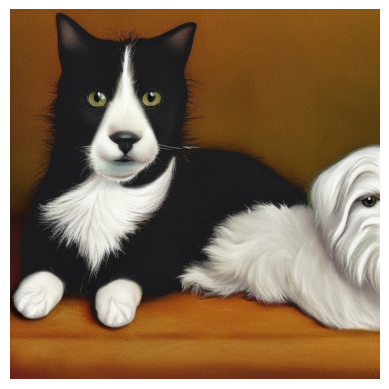

  0%|          | 0/50 [00:00<?, ?it/s]

Factor: 100


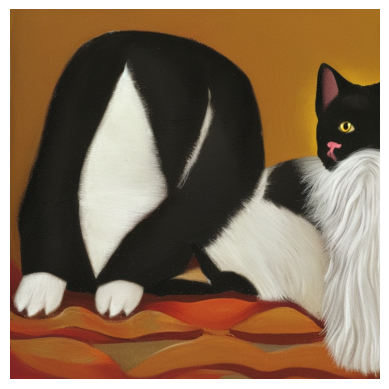

  0%|          | 0/50 [00:00<?, ?it/s]

Factor: 200


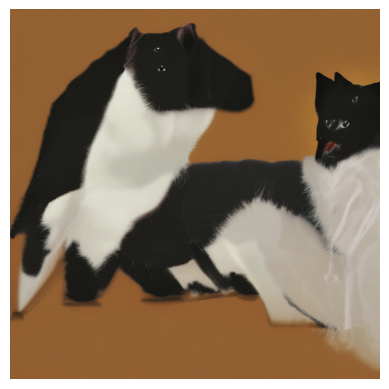

In [ ]:
# https://github.com/JonasLoos/h-space-directions/blob/main/h-space-directions.ipynb


move_vectors = [p - n for p, n in zip(pos_mid, neg_mid)]
factors = [0, 100, 200]
seed = 9
prompt = "a black cat with a white dog"

for factor in factors:
    def modify_h_space(module, input, output, step=[0]):
        change = factor * move_vectors[step[0]].to(output.device)
        step[0] += 1
        return output + change

    with torch.no_grad(), pipe.unet.mid_block.register_forward_hook(modify_h_space):
        generator = torch.Generator(device=device).manual_seed(seed)
        image = pipe(prompt, generator=generator).images[0]

    print(f'Factor: {factor}')
    plt.imshow(image)
    plt.axis('off')
    plt.show()


In [ ]:
from sklearn.decomposition import PCA

n_components = 5  # number of principal components to analyze
batch_size = 20  # adjust based on your GPU memory
n_batches = 20  # number of batches for PC generation
pc_scaling = 200  # scaling factor for principal components


def extract_h_spaces():
    '''extract h-space representations for use in PCA'''
    h_space = []
    def get_h_space(module, input, output):
        h_space[-1].append(output.cpu())
    with torch.no_grad(), pipe.unet.mid_block.register_forward_hook(get_h_space):
        for i in range(n_batches):
            h_space.append([])
            pipe(prompt, num_inference_steps=50, batch_size=batch_size)
    h_space = torch.cat([torch.stack(x, dim=1) for x in h_space])
    return h_space.view(-1, 50*1280*12*12).numpy()

# get PCs
pca = PCA(n_components=n_components)
pca.fit(extract_h_spaces())
pcs = torch.tensor(pca.components_.reshape(-1, 50, 1280, 12, 12)).cuda()


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
move_vectors[0].norm()

tensor(0.0815, device='cuda:0', dtype=torch.float16)

  0%|          | 0/50 [00:00<?, ?it/s]

Factor: 0


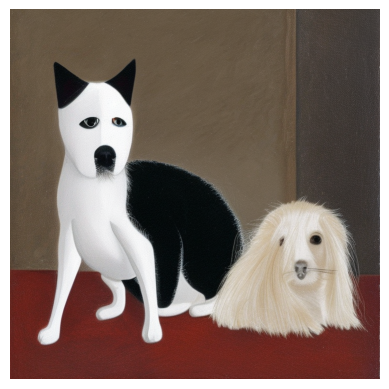

  0%|          | 0/50 [00:00<?, ?it/s]

Factor: 20000.0


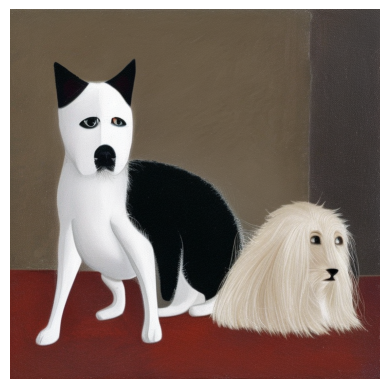

  0%|          | 0/50 [00:00<?, ?it/s]

Factor: 40000.0


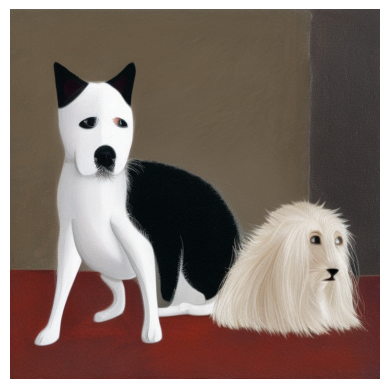

  0%|          | 0/50 [00:00<?, ?it/s]

Factor: 60000.0


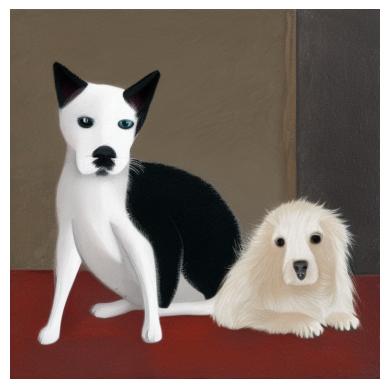

In [ ]:
move_vectors = pcs[0]
factors = [0, 2e4, 4e4, 6e4]
seed = 70
prompt = "a black cat with a white dog"

for factor in factors:
    def modify_h_space(module, input, output, step=[0]):
        change = factor * move_vectors[step[0]].to(output.device)
        step[0] += 1
        return output + change

    with torch.no_grad(), pipe.unet.mid_block.register_forward_hook(modify_h_space):
        generator = torch.Generator(device=device).manual_seed(seed)
        image = pipe(prompt, generator=generator).images[0]

    print(f'Factor: {factor}')
    plt.imshow(image)
    plt.axis('off')
    plt.show()


In [ ]:
from tqdm import tqdm


def plot_image_grid(prompt, n_rows, modification=lambda x: x, seed = None, row_labels=[]):
    '''plot grid of images generated with modifications'''

    # setup
    factors = [-2, -1, 0, 1, 2]
    fig, axarr = plt.subplots(n_rows, 5, figsize=(10, 2*n_rows), squeeze=False)
    if seed is None: seeds =  [x.item() for x in torch.randint(0, 100000, (n_rows,))]
    elif isinstance(seed, int): seeds = [seed] * n_rows
    elif isinstance(seed, list): seeds = seed
    else: raise ValueError('seed must be int, list or None')
    progress = tqdm(total=5*n_rows, desc='Generating images')

    # make image grid
    for j in range(n_rows):
        seed = seeds[j]
        for i, factor in enumerate(factors):

            # generate image with modification
            def modify_h_space(module, input, output, step=[0]):
                change = factor * modification(j, step[0])
                step[0] += 1
                return output + change
            with torch.no_grad(), pipe.unet.mid_block.register_forward_hook(modify_h_space):
                generator = torch.Generator(device=device).manual_seed(seed)
                image = pipe(prompt, num_inference_steps=50, generator=generator).images[0]

            # plot
            axarr[j, i].imshow(image)
            axarr[j, i].set_yticklabels([])
            axarr[j, i].set_xticklabels([])
            axarr[j, i].set_xticks([])
            axarr[j, i].set_yticks([])
            for key, spine in axarr[j, i].spines.items(): spine.set_visible(False)
            progress.update(1)

    # finish up
    for i, f in enumerate(factors):
        axarr[0, i].set_title(f'{f}' if f != 0 else 'original')
    for i, label in enumerate(row_labels):
        axarr[i, 0].set_ylabel(label)
    progress.close()
    plt.tight_layout()
    plt.show()


pcs = pcs.half()
pc_scaling = 2e4
plot_image_grid(
    prompt,
    n_rows = n_components,
    modification = lambda row, step: pcs[row,step,:,:,:] * pc_scaling,
    seed = torch.randint(0, 100000, (1,)).item(),
    row_labels = [f'PC{i}' for i in range(n_components)]
)


Generating images:   0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:   4%|▍         | 1/25 [00:05<02:22,  5.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:   8%|▊         | 2/25 [00:11<02:16,  5.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  12%|█▏        | 3/25 [00:17<02:10,  5.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  16%|█▌        | 4/25 [00:23<02:04,  5.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  20%|██        | 5/25 [00:29<01:58,  5.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  24%|██▍       | 6/25 [00:35<01:52,  5.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  28%|██▊       | 7/25 [00:41<01:46,  5.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  32%|███▏      | 8/25 [00:47<01:40,  5.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  36%|███▌      | 9/25 [00:53<01:34,  5.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  40%|████      | 10/25 [00:59<01:29,  5.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  44%|████▍     | 11/25 [01:05<01:23,  5.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  48%|████▊     | 12/25 [01:11<01:17,  5.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  52%|█████▏    | 13/25 [01:17<01:11,  5.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  56%|█████▌    | 14/25 [01:23<01:05,  5.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  60%|██████    | 15/25 [01:29<00:59,  5.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  64%|██████▍   | 16/25 [01:34<00:53,  5.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  68%|██████▊   | 17/25 [01:40<00:47,  5.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  72%|███████▏  | 18/25 [01:46<00:41,  5.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  76%|███████▌  | 19/25 [01:52<00:35,  5.95s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  80%|████████  | 20/25 [01:58<00:29,  5.95s/it]

  0%|          | 0/50 [00:00<?, ?it/s]